In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from numpy  import percentile
from numpy  import std
from numpy  import mean
import random
import scipy.stats as sts
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
st_VLE= pd.read_csv('studentVle.csv')
courses = pd.read_csv('courses.csv')
students=pd.read_csv('studentInfo.csv')
registration = pd.read_csv('studentRegistration.csv')
results = pd.read_csv('studentAssessment.csv')
assessment = pd.read_csv('assessments.csv')
VLE= pd.read_csv('vle.csv')

## Создание общей таблицы, отчистка данных
### Отбор студентов

Необходимо создать таблицу, которая будет содержать в себе всю необходимую информацию, и из которой будут исключены данные, невходящие в нашу выборку (то есть убираем данные, несоответствующие предъявленным требованиям (см. текст диплома)).
Эту таблицу на основе информации о студентах (таблица students), их активности (st_VLE), а также о дате их ухода с курса (для отсева тех, кто ушел до начала курса) (таблица registration)

In [3]:
students.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [4]:
students[pd.isna(students.imd_band) == True]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass
17,AAA,2013J,71361,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
28,AAA,2013J,104476,M,Ireland,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
34,AAA,2013J,114017,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
65,AAA,2013J,172112,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
66,AAA,2013J,172797,F,Ireland,A Level or Equivalent,NaN,35-55,0,60,N,Pass
68,AAA,2013J,175392,M,North Region,HE Qualification,NaN,35-55,0,60,N,Pass
88,AAA,2013J,227517,M,Ireland,HE Qualification,NaN,0-35,0,180,N,Fail
180,AAA,2013J,376439,M,North Region,HE Qualification,NaN,0-35,0,60,N,Distinction
184,AAA,2013J,386924,M,Ireland,Lower Than A Level,NaN,0-35,0,120,N,Pass


In [5]:
students.groupby(['region','imd_band']).count().groupby(['region']).max()

,code_module,code_presentation,id_student,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result
region,,,,,,,,,,
East Anglian Region,413,413,413,413,413,413,413,413,413,413
East Midlands Region,308,308,308,308,308,308,308,308,308,308
Ireland,122,122,122,122,122,122,122,122,122,122
London Region,690,690,690,690,690,690,690,690,690,690
North Region,243,243,243,243,243,243,243,243,243,243
North Western Region,730,730,730,730,730,730,730,730,730,730
Scotland,402,402,402,402,402,402,402,402,402,402
South East Region,292,292,292,292,292,292,292,292,292,292
South Region,671,671,671,671,671,671,671,671,671,671


In [6]:
st_VLE.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Видим, что в таблице students есть отсутствующие значения по полю imd_band. Поскольку этот показатель входит в нашу модель, студенты с отсутствующими значениями по этому полю должны быть исключены из рассмотрения.\
Также одним из требований к данным является их понятность и логичность. В ходе изучения данных и описания к ним осталось неясным содержание столбца studied_credits. Непонятно за что и как студенты получали баллы. Провека показала, что баллы никак не отражаются  на финальном результате.

In [7]:
final_res_dummies = pd.get_dummies(students.final_result)
pd.concat([students,final_res_dummies], axis =1).drop(['final_result','disability'], axis =1).iloc[:,-5:].corr()

,studied_credits,Distinction,Fail,Pass,Withdrawn
studied_credits,1.000000,-0.062286,-0.046976,-0.105391,0.191191
Distinction,-0.062286,1.000000,-0.168039,-0.249965,-0.215155
Fail,-0.046976,-0.168039,1.000000,-0.410719,-0.353522
Pass,-0.105391,-0.249965,-0.410719,1.000000,-0.525880
Withdrawn,0.191191,-0.215155,-0.353522,-0.525880,1.000000


 Убираем эту переменную из рассмотрения

In [8]:
pd.concat([students,final_res_dummies], axis =1).drop(['final_result'], axis =1).corr()

,id_student,num_of_prev_attempts,studied_credits,Distinction,Fail,Pass,Withdrawn
id_student,1.000000,0.011473,-0.003868,0.027431,-0.029029,0.004631,0.003774
num_of_prev_attempts,0.011473,1.000000,0.181729,-0.065599,0.090848,-0.069281,0.032903
studied_credits,-0.003868,0.181729,1.000000,-0.062286,-0.046976,-0.105391,0.191191
Distinction,0.027431,-0.065599,-0.062286,1.000000,-0.168039,-0.249965,-0.215155
Fail,-0.029029,0.090848,-0.046976,-0.168039,1.000000,-0.410719,-0.353522
Pass,0.004631,-0.069281,-0.105391,-0.249965,-0.410719,1.000000,-0.525880
Withdrawn,0.003774,0.032903,0.191191,-0.215155,-0.353522,-0.525880,1.000000


In [9]:
pd.concat([students,final_res_dummies], axis =1).drop(['final_result'], axis =1)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Distinction,Fail,Pass,Withdrawn
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,0,0,1,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,0,0,1,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,0,0,0,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,0,0,1,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,0,0,1,0
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,0,0,1,0
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,0,0,1,0
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,0,0,1,0
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,0,0,1,0
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,0,0,1,0


Группируем данные с целью определения суммы кликов по всем ресурсам в активные дни для каждого студента в рамках 1-го курса

In [10]:
st_VLE_sum= st_VLE.groupby(['code_module','code_presentation', 'id_student', 'date']).sum().reset_index().drop(['id_site'], axis=1)
st_VLE_sum.head()

,code_module,code_presentation,id_student,date,sum_click
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3


Добавляем к таблице с результатами контрольх испытаний финльный результат прохождения курса. Убираем из рассматрения студентов, которые покинули обучение еще до его начала или в день регистрации. А также тех, кто курс проходит повторно.

In [11]:
students_reg= students[(students.num_of_prev_attempts ==0) & (pd.isna(students.imd_band) ==False)]. \
        merge(registration[((registration.date_unregistration >registration.date_registration) &\
                            (registration.date_unregistration >0) )| (pd.isna(registration.date_unregistration) == True)],\
        how ='inner', on=['code_module','code_presentation', 'id_student'])

st_VLE_fr=st_VLE_sum.merge(students_reg, how ='inner', on=['code_module','code_presentation','id_student'])


total_table=st_VLE_fr.drop(st_VLE_fr.iloc[:, [6,10,11,14,15]], axis=1)
total_table.tail()

,code_module,code_presentation,id_student,date,sum_click,gender,highest_education,imd_band,age_band,disability,final_result
1539448,GGG,2014J,2684003,156,11,F,HE Qualification,50-60%,35-55,N,Distinction
1539449,GGG,2014J,2684003,171,31,F,HE Qualification,50-60%,35-55,N,Distinction
1539450,GGG,2014J,2684003,194,1,F,HE Qualification,50-60%,35-55,N,Distinction
1539451,GGG,2014J,2684003,205,45,F,HE Qualification,50-60%,35-55,N,Distinction
1539452,GGG,2014J,2684003,219,40,F,HE Qualification,50-60%,35-55,N,Distinction


Проверяем на наличие незаполненных строк

In [12]:
total_table.isnull().sum()

code_module          0
code_presentation    0
id_student           0
date                 0
sum_click            0
gender               0
highest_education    0
imd_band             0
age_band             0
disability           0
final_result         0
dtype: int64

### Отбор курсов

In [13]:
assessment[(assessment.assessment_type != 'Exam')].groupby(['code_module', 'code_presentation']).sum(). drop(['id_assessment', 'date'], axis =1)

weight
code_module code_presentation        
AAA         2013J               100.0
            2014J               100.0
BBB         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
CCC         2014B               100.0
            2014J               100.0
DDD         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
EEE         2013J               100.0
            2014B               100.0
            2014J               100.0
FFF         2013B               100.0
            2013J               100.0
            2014B               100.0
            2014J               100.0
GGG         2013J                 0.0
            2014B                 0.0
            2014J                 0.0

Исключаем из рассмотрения курс GGG, тк промежуточные испытания не имели веса в итоговой оценке за курс, что не сооттветствует требованиям к рассматриваемым нами данным. Также непонятны причины резкого увеличение активности после 80 дня.

In [14]:
st_VLE[(st_VLE['code_module']== 'GGG')].code_presentation.unique()

array(['2013J', '2014B', '2014J'], dtype=object)

In [15]:
st_VLE_GGG= st_VLE[(st_VLE['code_module'] == 'GGG') & (st_VLE['code_presentation'] == '2013J')]
clicks_GGG= st_VLE_GGG.groupby('date').agg({'sum_click': 'sum'}).reset_index()

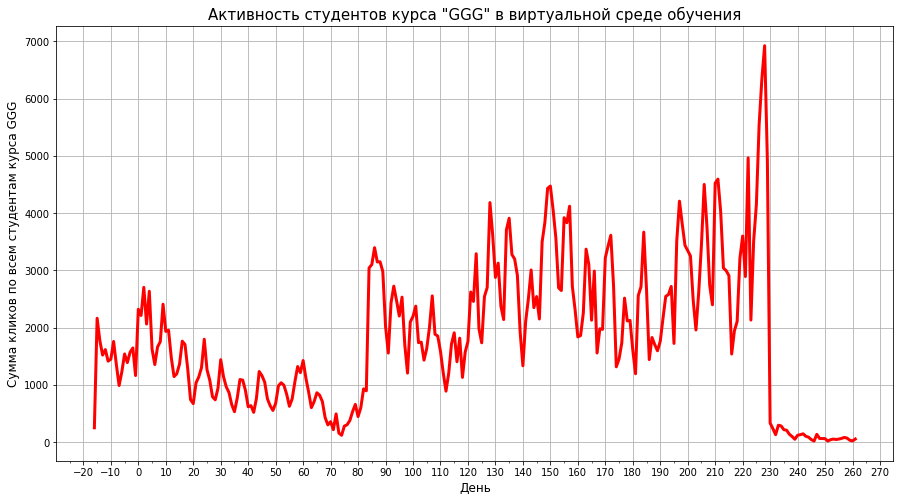

In [16]:
x_GGG = clicks_GGG['date']
y_GGG= clicks_GGG['sum_click']

fig, ax = plt.subplots()

ax.plot(x_GGG, y_GGG, color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.xlabel('День', fontsize =12)
plt.ylabel('Сумма кликов по всем студентам курса GGG', fontsize =12)
plt.title('Активность студентов курса "GGG" в виртуальной среде обучения' , fontsize =15)
plt.grid()

fig.set_figwidth(15)
fig.set_figheight(8)

In [17]:
assessment_GGG= assessment[(assessment['code_module'] == 'GGG') & (assessment['code_presentation'] == '2014B')]
assessment_GGG

,code_module,code_presentation,id_assessment,assessment_type,date,weight
186,GGG,2014B,37428,CMA,222.0,0.0
187,GGG,2014B,37429,CMA,222.0,0.0
188,GGG,2014B,37430,CMA,222.0,0.0
189,GGG,2014B,37431,CMA,222.0,0.0
190,GGG,2014B,37432,CMA,222.0,0.0
191,GGG,2014B,37433,CMA,222.0,0.0
192,GGG,2014B,37425,TMA,61.0,0.0
193,GGG,2014B,37426,TMA,117.0,0.0
194,GGG,2014B,37427,TMA,166.0,0.0
195,GGG,2014B,37434,Exam,222.0,100.0


Для выбора курсов и конкретного потока в частности, необходимо убедиться, что поведение студентов в выбранных потоках не является аномальным. Для этого сравним активность стдентов разных потоков и курсов. Однако перед этим убедимся, что в потоках одного курса сохраняется одинаковое количество контрольных испытаний. Если количество испытаний в разных потоках одного курса будет различным, эти потоки исключаются из рассмотрения.

In [18]:
(assessment[(assessment.code_module != 'GGG')&(assessment.assessment_type != 'Exam')].
 groupby(['code_module','code_presentation','assessment_type']).count().drop(['date','weight'], axis=1))


id_assessment
code_module code_presentation assessment_type               
AAA         2013J             TMA                          5
            2014J             TMA                          5
BBB         2013B             CMA                          5
                              TMA                          6
            2013J             CMA                          5
                              TMA                          6
            2014B             CMA                          5
                              TMA                          6
            2014J             TMA                          5
CCC         2014B             CMA                          4
                              TMA                          4
            2014J             CMA                          4
                              TMA                          4
DDD         2013B             CMA                          7
                              TMA                          6
            2013J             TMA                          6
            2014B             TMA                          6
            2014J             TMA                          6
EEE         2013J             TMA                          4
            2014B             TMA                          4
            2014J             TMA                          4
FFF         2013B             CMA                          7
                              TMA                          5
            2013J             CMA                          7
                              TMA                          5
            2014B             CMA                          7
                              TMA                          5
            2014J             CMA                          7
                              TMA                          5

Из таблицы видно, что в рамках курса ВВВ у потока 2014J изменилось количество испытаний: остались только 5 испытаний, оцениваемых преподавателем (ТМА), хотя у остальных потоков их было 6, а также было 5 испытаний, оцениваемых компьютером (СМА). \
Кроме того, в потоке 2013В в рамках курса DDD было 7 СМА и 6 ТМА, впоследующих же потоках осталось только 6 ТМА. Поэтому поток 2013В исключаем из рассмотрения

In [19]:
#исключаем неподходящие курсы из рассмотрения
activity=total_table[(total_table.code_module != 'GGG')&\
                    ((total_table.code_module != 'DDD')| (total_table.code_presentation != '2013B'))&\
                    ((total_table.code_module != 'BBB')| (total_table.code_presentation != '2014J'))]

activity_graph=activity.iloc[:,[0,1,3,4]].groupby(['code_module','code_presentation','date']).sum().reset_index()

In [20]:
"""Cоздаем таблицу, на основе которой будем рисовать график. 
В таблице отображаем сумму кликов в системе VLE по всем студентам каждого потока"""

activity_graph=activity.iloc[:,[0,1,3,4]].groupby(['code_module','code_presentation','date']).sum().reset_index()

In [21]:
"""Добавляем столбец %, в котором отображается информация о том, 
какой % кликов был сделан в конкретный день из всех кликов на курсе за все время"""

activity_graph_fnl=activity_graph.merge(activity_graph.groupby(['code_module','code_presentation']).\
                                        sum().reset_index().drop('date', axis=1), how ='left', \
                                        on=['code_module','code_presentation'])
activity_graph_fnl['%']=activity_graph_fnl['sum_click_x']/activity_graph_fnl['sum_click_y']*100
activity_graph_fnl=activity_graph_fnl.drop('sum_click_y',axis =1)
activity_graph_fnl.head()

,code_module,code_presentation,date,sum_click_x,%
0,AAA,2013J,-10,10965,1.776212
1,AAA,2013J,-9,5410,0.876362
2,AAA,2013J,-8,3270,0.529705
3,AAA,2013J,-7,3335,0.540234
4,AAA,2013J,-6,3923,0.635484


In [22]:
table_activity = pd.pivot_table(activity_graph_fnl, values='%', index=['date'], \
                                columns=['code_module','code_presentation'],  aggfunc=np.sum, fill_value=0)
table_activity.head()

code_module         AAA             BBB                   CCC         DDD  \
code_presentation 2013J     2014J 2013B     2013J 2014B 2014B 2014J 2013J   
date                                                                        
-25                 0.0  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
-24                 0.0  1.382595   0.0  0.000000   0.0   0.0   0.0   0.0   
-23                 0.0  0.674339   0.0  0.000905   0.0   0.0   0.0   0.0   
-22                 0.0  0.568574   0.0  0.000000   0.0   0.0   0.0   0.0   
-21                 0.0  0.306170   0.0  0.000000   0.0   0.0   0.0   0.0   

code_module                         EEE               FFF                    
code_presentation 2014B     2014J 2013J 2014B 2014J 2013B 2013J 2014B 2014J  
date                                                                         
-25                 0.0  0.964924   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-24                 0.0  0.404067   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-23                 0.0  0.346648   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-22                 0.0  0.149271   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
-21                 0.0  0.116888   0.0   0.0   0.0   0.0   0.0   0.0   0.0

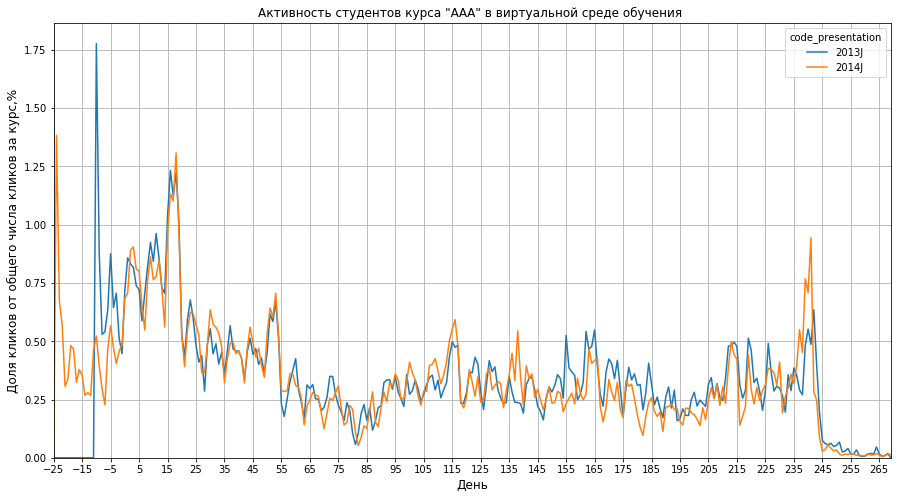

In [23]:
table_activity['AAA'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс,%', fontsize =12)
plt.title('Активность студентов курса "AAA" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


In [24]:
assessment[(assessment.code_module == 'AAA')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0



### Аналогичная статистика с рандомной  малой выборкой

Построим график активности случайной выборки из числа студентов курса AAA, чтобы посмотреть, как он соотносится с поведеним ген. совокупности.

In [25]:
len(activity[(activity.code_module == 'AAA')&(activity.code_presentation=='2014J')]['id_student'].unique())

306

In [26]:
activity_AAA_2013J=(random.sample(activity[(activity.code_module == 'AAA')&(activity.code_presentation == '2013J')]
                                  ['id_student'].unique().tolist(),30))
activity_AAA_2014J=(random.sample(activity[(activity.code_module == 'AAA')&(activity.code_presentation == '2014J')]
                                  ['id_student'].unique().tolist(),30))
activity_AAA_list=activity_AAA_2014J+activity_AAA_2013J

In [27]:
activity_AAA_2013J=[2437837, 346025, 1620151, 2411778, 749412, 383254, 2645733, 242793, 588775, 2600688, 402470,
                    2529279, 129955, 364177, 305386, 444677, 98094, 2344901, 2461190, 1889577, 307866, 2516503,
                    31604, 205350, 102806, 2342426, 2650282, 175932, 2689958, 2255601]
activity_AAA_2014J=[330594, 382095, 2522927, 108872, 1947156, 1967783, 998493, 75255, 1629771, 548120, 2148681, 
                    442064, 2521865, 2677624, 431025, 323370, 596288, 1757766, 304465, 199897, 404356, 345440,
                    383723, 298838, 260623, 254625, 409703, 111512, 356170, 387533]

In [28]:
activity_AAA=activity[(activity.code_module =='AAA')&(activity['id_student'].isin(activity_AAA_list))]

In [29]:
activity_AAA_clicks=pd.pivot_table(activity_AAA, values='sum_click', index=['date'], \
                                columns=['code_module','code_presentation'],  aggfunc=np.sum, fill_value=0)
activity_AAA_clicks.head()

code_module         AAA      
code_presentation 2013J 2014J
date                         
-24                   0   713
-23                   0   310
-22                   0   418
-21                   0   160
-20                   0   264

In [30]:
def share(a):
    return round(a/a.sum()*100,2)
activity_AAA_clicks=activity_AAA_clicks.apply(share, axis=0)

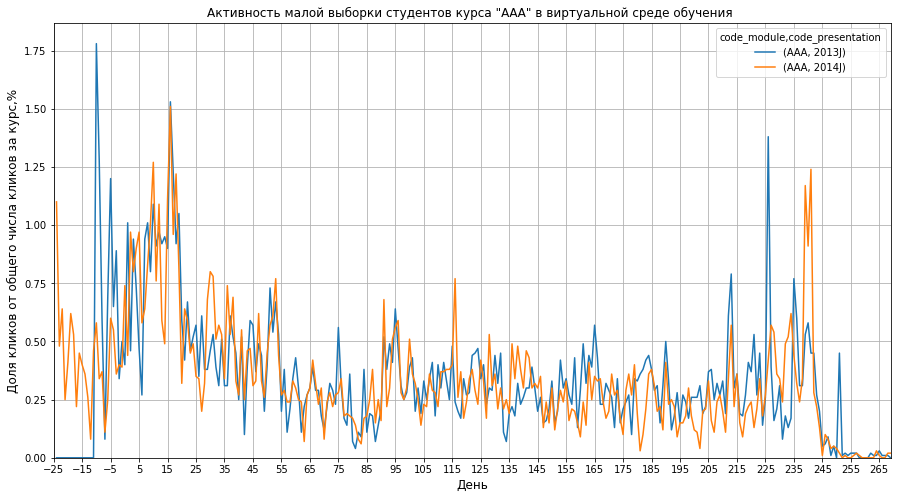

In [31]:
activity_AAA_clicks.plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс,%', fontsize =12)
plt.title('Активность малой выборки студентов курса "AAA" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()

In [32]:


sts.ttest_1samp(activity_AAA_clicks['AAA']['2013J'], table_activity['AAA']['2013J'].mean())

Ttest_1sampResult(statistic=0.06631462681030394, pvalue=0.9471725641074656)

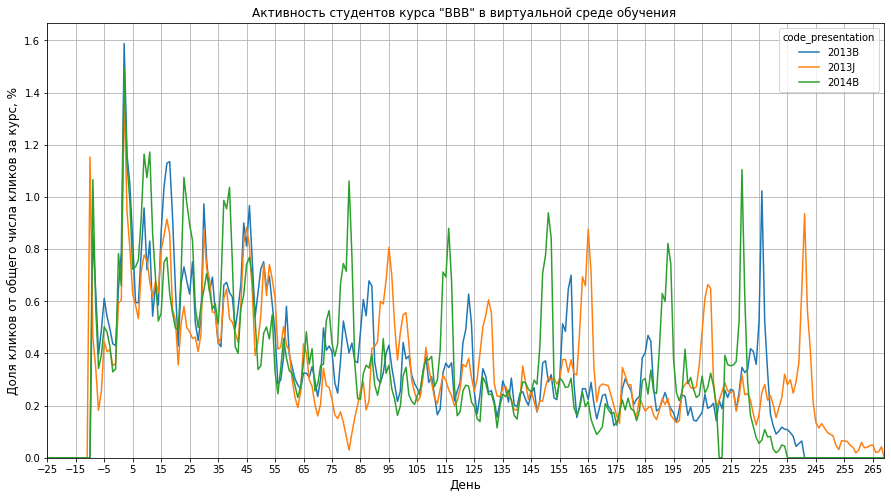

In [33]:
table_activity['BBB'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "BBB" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


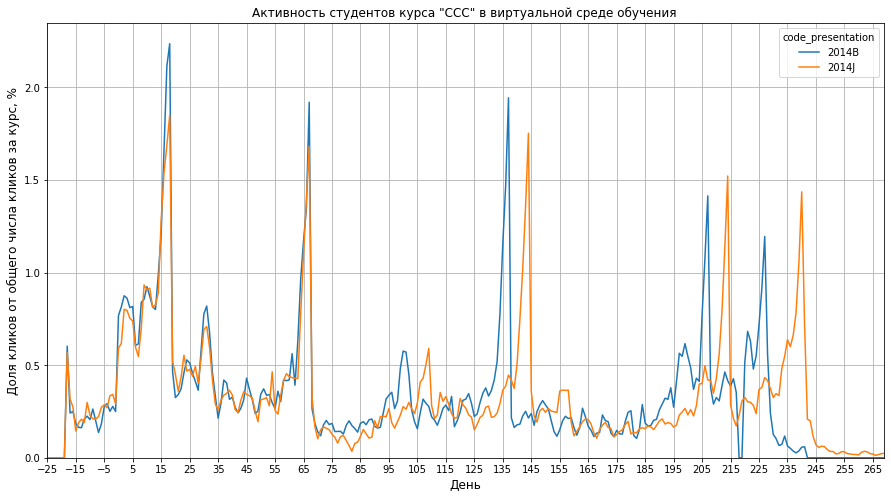

In [34]:
table_activity['CCC'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "CCC" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


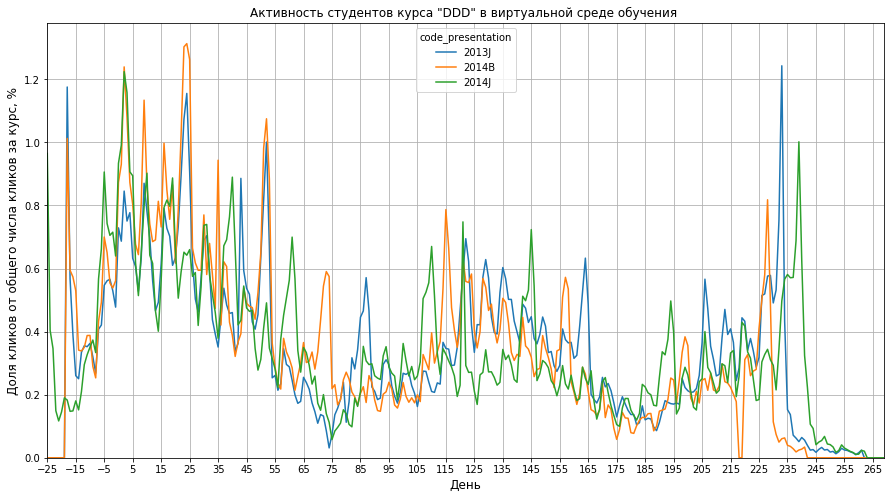

In [35]:
table_activity['DDD'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "DDD" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


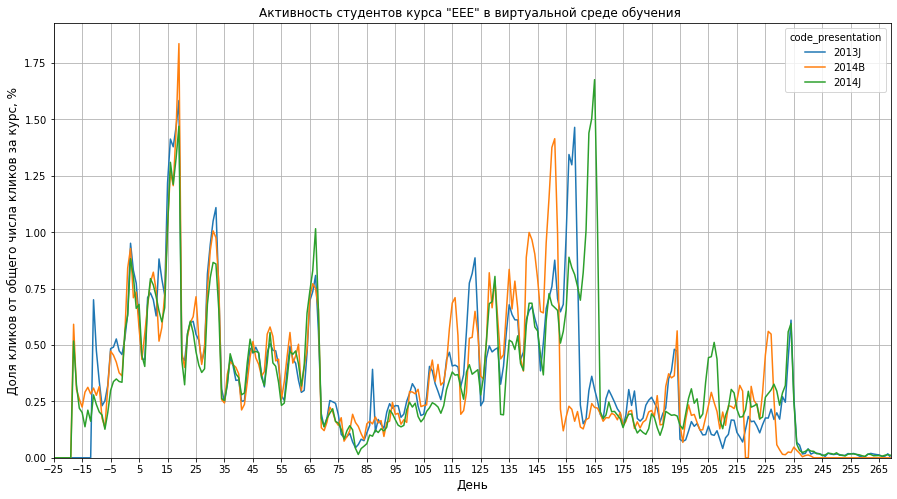

In [36]:
table_activity['EEE'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "EEE" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()


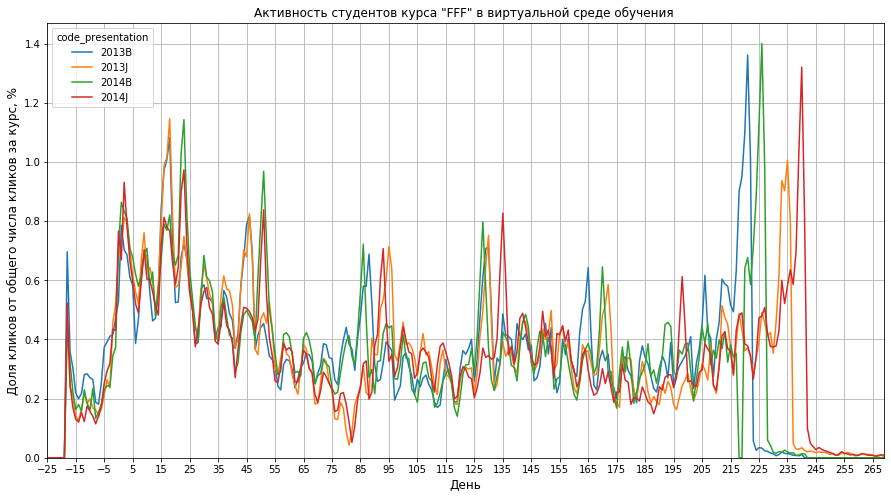

In [37]:
table_activity['FFF'].plot(figsize=(15,8))
plt.xlabel('День', fontsize =12)
plt.ylabel('Доля кликов от общего числа кликов за курс, %', fontsize =12)
plt.title('Активность студентов курса "FFF" в виртуальной среде обучения ')
plt.grid()
plt.ylim(0)
plt.xlim(-25)
plt.xticks(np.arange(-25, 270, 10)) 
plt.show()

На графиках видно, что поведение студентов из разных потоков, но в рамках одного курса очень схоже. Имеет место быть небольшое смещение пиков кривых в силу изменения дат контрольных испытаний. 

Поведение студентов различных курсов различается между собой. Но это говорит скорее о специфике курса, нежели о специфике поведения студентов

Также можно увидеть, что во всех потоках, которые стартовали в феврале 2014 года (2014В), в районе 215 дня имеется нулевое значение активности. Поскольку данная ситуация наблюдается на всех курсах, можно сделать вывод о том, что это связано с неполадкой программного обеспечения, отвечающего за контроль активности студентов. На этом основании потоки 2014В не включены в рассмотрение.

ИТОГ: В нашу выборку мы берем по 1 потоку от каждого курса, за исключением тех, которые мы отсеяли ранее

In [38]:
total_table=total_table[((total_table.code_module == "AAA") & (total_table.code_presentation == "2013J")) | \
                                 ((total_table.code_module == "BBB") & (total_table.code_presentation == "2013B")) | \
                                 ((total_table.code_module == "CCC") & (total_table.code_presentation == "2014J")) | \
                                 ((total_table.code_module == "DDD") & (total_table.code_presentation == "2014J")) | \
                                 ((total_table.code_module == "EEE") & (total_table.code_presentation == "2014J")) | \
                                 ((total_table.code_module == "FFF") & (total_table.code_presentation == "2013B"))]

## 1 этап проверки гипотез
### Модель классификации
#### Подготовка данных
Перед нами стоит задача построить модель, которая бы предсказывала результат обучения студента в зависимости от его характеристик. В качестве результата (зависимая переменная) выступаетпеременная final_result, которая принимает 4 значения: 

Distinction - завершил обучение с отличием, \
Pass - завершил обучение, \
Fail - провалил обучение, \
Withdrawn - покинул обучение.

В данном случае мы решаем задачу классификации студента (отнесение студента к той или иной группе). Посмотрим на количество данных (количество студентов) в каждой группе. 

In [39]:
print('Количество значений Distinction: ', len(total_table[total_table.final_result =='Distinction'].id_student.unique()))
print('Количество значений Fail: ', len(total_table[total_table.final_result =='Fail'].id_student.unique()))
print('Количество значений Pass: ', len(total_table[total_table.final_result =='Pass'].id_student.unique()))
print('Количество значений Withdrawn: ', len(total_table[total_table.final_result =='Withdrawn'].id_student.unique()))

Количество значений Distinction:  729
Количество значений Fail:  1344
Количество значений Pass:  2849
Количество значений Withdrawn:  1682


Видим, что количество студентов в каждой группе различно. С проблемой классификации с несбалансированными данными хорошо работает метод решения деревьев. Но перед тем, как строить модель нужно подготовить таблицу, включающую в себя все независимые и зависимые переменные.

Создаем таблицу, содержащую информацию по всем переменным активности студентов, которые войдут в рассмотрение.Создаем ее на основе общей таблицы (total_table). Далее производим действия (дополнительные расчеты и объединения с другими таблицами), которые приведут таблицу к финальному виду со следующими столбцами:\
code_module, \
code_presentation, \
id_student,\
active_days - число дней взаимодействия студента с ВСО, \
total_clicks - суммарное количество кликов в системе ВСО за курс, \
active_days_assessment- число дней взаимодействия студента с ВСО в период проведения контрольных испытаний, \
active_days_study - число дней взаимодействия студента с ВСО в период простого обучения, \
clicks_assessment - суммарное количество кликов в системе ВСО в период проведения контрольных испытаний, \
clicks_study - суммарное количество кликов в системе ВСО в период простого обучения, 
activity_index - индекс активности студента (отображает регулярность взаимодействия с ВСО), \
mean_clicks - среднее число кликов в день за весь период обучения, \
mean_clicks_assessment - среднее число кликов в дни контрольных испытаний, \
mean_clicks_study - среднее число кликов в дни простого обучения

In [40]:
activity_table= total_table.iloc[:,:5]
activity_table.head()

,code_module,code_presentation,id_student,date,sum_click
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3


Для более детального изучения активности студентов, разделим процесс обучения на 2 категории в зависимотси от периода: период контрольных испытаний и период "стандартного" обучения.
Определяем список дат, в которые проходили контрольные испытания в выбранных нами курсах

In [41]:
dates_AAA = assessment[(assessment.code_module == 'AAA')&(assessment.code_presentation== '2013J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_BBB = assessment[(assessment.code_module == 'BBB')&(assessment.code_presentation== '2013B')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_CCC = assessment[(assessment.code_module == 'CCC')&(assessment.code_presentation== '2014J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_DDD = assessment[(assessment.code_module == 'DDD')&(assessment.code_presentation== '2014J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_EEE = assessment[(assessment.code_module == 'EEE')&(assessment.code_presentation== '2014J')&(assessment.date.isnull() == False)]['date'].unique().tolist()
dates_FFF = assessment[(assessment.code_module == 'FFF')&(assessment.code_presentation== '2013B')&(assessment.date.isnull() == False)]['date'].unique().tolist()


Мы установили, что период контрольных испытаний будет начинаться за 5 дней до контрольного испытания и заканчиваться непосредственно в день испытания. Поэтому расширям список дат, входящих в период проведения контрольных испытний

In [42]:
full_dates_AAA=[date-z for date in dates_AAA for z in range (0, 5) ]
full_dates_BBB=[date-z for date in dates_BBB for z in range (0, 5)]
full_dates_CCC=[date-z for date in dates_CCC for z in range (0, 5)]
full_dates_DDD=[date-z for date in dates_DDD for z in range (0, 5)]
full_dates_EEE=[date-z for date in dates_EEE for z in range (0, 5)]
full_dates_FFF=[date-z for date in dates_FFF for z in range (0, 5)]

assessment_dates =dict(zip(list(students_reg.code_module.unique()),\
                        [full_dates_AAA, full_dates_BBB, full_dates_CCC, full_dates_DDD, full_dates_EEE, full_dates_FFF]))

Создаем функцию, определящую тип периода в зависимости от даты.

In [43]:
def study_period(a):
    if a.code_module in list(assessment_dates.keys()):
        if a.date in assessment_dates[a.code_module]:
            return 'assessment period'
    return 'study period'

In [44]:
activity_table['period_type'] = activity_table.apply(study_period, axis=1)
activity_table.head()

,code_module,code_presentation,id_student,date,sum_click,period_type
0,AAA,2013J,11391,-5,98,study period
1,AAA,2013J,11391,0,49,study period
2,AAA,2013J,11391,1,127,study period
3,AAA,2013J,11391,2,4,study period
4,AAA,2013J,11391,6,3,study period


Группируем данные таблицы так, чтобы получить переменные  active_days, total_clicks и start_activity_date,необходиой для расчета activity_index

In [45]:
activity_table_2 = activity_table.groupby(['code_module','code_presentation','id_student']).\
                    agg({'date':[np.min, pd.Series.nunique],  'sum_click':  np.sum}).reset_index()
activity_table_2.columns=['code_module','code_presentation','id_student','start_activity_date',\
                          'active_days','total_clicks']
activity_table_2.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks
0,AAA,2013J,11391,-5,40,934
1,AAA,2013J,28400,-10,80,1435
2,AAA,2013J,30268,-10,12,281
3,AAA,2013J,31604,-10,123,2158
4,AAA,2013J,32885,-10,70,1034


Рассчитываем количество активных дней и сумму кликов в зависимости от периода.

In [46]:
period=(pd.pivot_table(activity_table, values=['sum_click', 'date'], index=['code_module','id_student'],
                       columns=['period_type'],  aggfunc={'date': pd.Series.nunique,  'sum_click':  np.sum}, fill_value=0).
        reset_index())
period.columns=['code_module','id_student','date_assessment_period','date_study_period','clicks_assessment_period',
                'clicks_study_period']

period.head()

,code_module,id_student,date_assessment_period,date_study_period,clicks_assessment_period,clicks_study_period
0,AAA,11391,5,35,120,814
1,AAA,28400,7,73,150,1285
2,AAA,30268,0,12,0,281
3,AAA,31604,18,105,329,1829
4,AAA,32885,3,67,36,998


Добавляем эти переменные к основной таблице активности 

In [47]:
activity_table_3=(activity_table_2.merge(registration, how='left', on =['code_module','code_presentation','id_student']).\
                  drop(['date_registration'], axis=1))
activity_table_4=activity_table_3.merge(period, on =['code_module','id_student'], how= 'left')
activity_table_4.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks,date_unregistration,date_assessment_period,date_study_period,clicks_assessment_period,clicks_study_period
0,AAA,2013J,11391,-5,40,934,NaN,5,35,120,814
1,AAA,2013J,28400,-10,80,1435,NaN,7,73,150,1285
2,AAA,2013J,30268,-10,12,281,12.0,0,12,0,281
3,AAA,2013J,31604,-10,123,2158,NaN,18,105,329,1829
4,AAA,2013J,32885,-10,70,1034,NaN,3,67,36,998


In [48]:
activity_table_4.columns.values[7:11]=['active_days_assessment','active_days_study', 'clicks_assessment', 'clicks_study']
activity_table_4.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks,date_unregistration,active_days_assessment,active_days_study,clicks_assessment,clicks_study
0,AAA,2013J,11391,-5,40,934,NaN,5,35,120,814
1,AAA,2013J,28400,-10,80,1435,NaN,7,73,150,1285
2,AAA,2013J,30268,-10,12,281,12.0,0,12,0,281
3,AAA,2013J,31604,-10,123,2158,NaN,18,105,329,1829
4,AAA,2013J,32885,-10,70,1034,NaN,3,67,36,998


Создаем функцию, рассчитывающую количество дней, которые студент провел на курсе. Эта переменныя понадобится для расчета activity_index

In [49]:
def days_on_course(a):
    if pd.isna(a.date_unregistration) == True:
        return (int((courses[((courses.code_module == a.code_module)& 
                              (courses.code_presentation == a.code_presentation))]['module_presentation_length'] 
                     - a.start_activity_date)))
    return (a.date_unregistration - a.start_activity_date)

In [50]:
activity_table_4['days_on_course'] = activity_table_4.apply(days_on_course, axis=1)

Удаляем из рассмотрения студентов, которые провели на курсе меньше суток со дня начала их активности

In [51]:
activity_table_final=activity_table_4[activity_table_4.days_on_course != 0]

In [52]:
activity_table_final.head()

,code_module,code_presentation,id_student,start_activity_date,active_days,total_clicks,date_unregistration,active_days_assessment,active_days_study,clicks_assessment,clicks_study,days_on_course
0,AAA,2013J,11391,-5,40,934,NaN,5,35,120,814,273.0
1,AAA,2013J,28400,-10,80,1435,NaN,7,73,150,1285,278.0
2,AAA,2013J,30268,-10,12,281,12.0,0,12,0,281,22.0
3,AAA,2013J,31604,-10,123,2158,NaN,18,105,329,1829,278.0
4,AAA,2013J,32885,-10,70,1034,NaN,3,67,36,998,278.0


Добавляем переменные activity_index, mean_clicks, mean_clicks_assessment, mean_clicks_study

In [53]:
activity_table_final['activity_index']= round(activity_table_final.active_days/activity_table_final.days_on_course, 2)

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
activity_table_final['mean_clicks']= round(activity_table_final.total_clicks/activity_table_final.active_days,2).fillna(0)
activity_table_final['mean_clicks_assessment']=(round(activity_table_final.clicks_assessment/activity_table_final.
                                                      active_days_assessment,2).fillna(0))
activity_table_final['mean_clicks_study']=(round(activity_table_final.clicks_study/activity_table_final.
                                                 active_days_study,2).fillna(0))

C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Natalia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [55]:
activity_table_final=activity_table_final.drop(['start_activity_date','date_unregistration','days_on_course'], axis =1)


После всех манипуляций получили таблицу activity_table_final, содержащую все переменные из группы активности студентов, которые войдут в модель исследования.

In [56]:
activity_table_final.head()

,code_module,code_presentation,id_student,active_days,total_clicks,active_days_assessment,active_days_study,clicks_assessment,clicks_study,activity_index,mean_clicks,mean_clicks_assessment,mean_clicks_study
0,AAA,2013J,11391,40,934,5,35,120,814,0.15,23.35,24.00,23.26
1,AAA,2013J,28400,80,1435,7,73,150,1285,0.29,17.94,21.43,17.60
2,AAA,2013J,30268,12,281,0,12,0,281,0.55,23.42,0.00,23.42
3,AAA,2013J,31604,123,2158,18,105,329,1829,0.44,17.54,18.28,17.42
4,AAA,2013J,32885,70,1034,3,67,36,998,0.25,14.77,12.00,14.90


Добавляем к таблице activity_table_final переменые по социально-демографическим характеристикам из таблицы students. На основе этой таблицы мы будем производить моделирование.

In [57]:
model_table=(activity_table_final.merge(students.iloc[:,[0,1,2,3,5,6,7,9,10,11]], how='left', 
                                        on =['code_module','code_presentation','id_student']))
model_table.head()

,code_module,code_presentation,id_student,active_days,total_clicks,active_days_assessment,active_days_study,clicks_assessment,clicks_study,activity_index,mean_clicks,mean_clicks_assessment,mean_clicks_study,gender,highest_education,imd_band,age_band,studied_credits,disability,final_result
0,AAA,2013J,11391,40,934,5,35,120,814,0.15,23.35,24.00,23.26,M,HE Qualification,90-100%,55<=,240,N,Pass
1,AAA,2013J,28400,80,1435,7,73,150,1285,0.29,17.94,21.43,17.60,F,HE Qualification,20-30%,35-55,60,N,Pass
2,AAA,2013J,30268,12,281,0,12,0,281,0.55,23.42,0.00,23.42,F,A Level or Equivalent,30-40%,35-55,60,Y,Withdrawn
3,AAA,2013J,31604,123,2158,18,105,329,1829,0.44,17.54,18.28,17.42,F,A Level or Equivalent,50-60%,35-55,60,N,Pass
4,AAA,2013J,32885,70,1034,3,67,36,998,0.25,14.77,12.00,14.90,F,Lower Than A Level,50-60%,0-35,60,N,Pass


Таблица содержит много качественных данных, которые нужно преобразовать для анализа. Все переменные, которые могут принимать только 2 значения (Пол, наличие инвалидности), перекодируем с помощью метода get_dummies. Ранжируем переменные, которые можно проранжировать (уровень образования,уровень депривации, возраст)  от меньшего к большему.

In [58]:
def education(a):
    if a == 'Lower Than A Level':
        return 1
    if a == 'A Level or Equivalent':
        return 2
    if a == 'HE Qualification':
        return 3
    if a == 'Post Graduate Qualification':
        return 4
    return 0
    
model_table.highest_education=model_table.highest_education.apply(education)

In [59]:
def imd(a):
    if a == '10-20%':
        return 1
    if a == '20-30%':
        return 2
    if a == '30-40%':
        return 3
    if a == '40-50%':
        return 4
    if a == '50-60%':
        return 5
    if a == '60-70%':
        return 6
    if a == '70-80%':
        return 7
    if a == '80-90%':
        return 8
    if a == '90-100%':
        return 9
    return 0
model_table.imd_band=model_table.imd_band.apply(imd)

In [60]:
def age(a):
    if a == '0-35':
        return 0
    if a == '35-55':
        return 1
    return 2
model_table.age_band=model_table.age_band.apply(age)

In [61]:
model_table_with_dummies = pd.get_dummies(model_table, columns=['gender', 'disability'])
model_table_with_dummies.columns

Index(['code_module', 'code_presentation', 'id_student', 'active_days',
       'total_clicks', 'active_days_assessment', 'active_days_study',
       'clicks_assessment', 'clicks_study', 'activity_index', 'mean_clicks',
       'mean_clicks_assessment', 'mean_clicks_study', 'highest_education',
       'imd_band', 'age_band', 'studied_credits', 'final_result', 'gender_F',
       'gender_M', 'disability_N', 'disability_Y'],
      dtype='object')

Посокльку переменную final_result нельзя проранжировать от меньшего к большему, мы перекодируем ее с помощю метода get_dummies, как и переменные gender и disability. Теперь вместо 1 колонки final_result, у нас появилось  4, каждая из которых принимает значение 1 или 0.
После всех преобразований мы получаем таблицу, на основе которой будем строить нашу модель

In [62]:
dummies = pd.get_dummies(model_table_with_dummies.final_result)
model_table_dummies= pd.concat([model_table_with_dummies, dummies], axis =1)
model_table_dummies= model_table_dummies.drop('final_result', axis =1)
model_table_dummies.head()

,code_module,code_presentation,id_student,active_days,total_clicks,active_days_assessment,active_days_study,clicks_assessment,clicks_study,activity_index,...,age_band,studied_credits,gender_F,gender_M,disability_N,disability_Y,Distinction,Fail,Pass,Withdrawn
0,AAA,2013J,11391,40,934,5,35,120,814,0.15,...,2,240,0,1,1,0,0,0,1,0
1,AAA,2013J,28400,80,1435,7,73,150,1285,0.29,...,1,60,1,0,1,0,0,0,1,0
2,AAA,2013J,30268,12,281,0,12,0,281,0.55,...,1,60,1,0,0,1,0,0,0,1
3,AAA,2013J,31604,123,2158,18,105,329,1829,0.44,...,1,60,1,0,1,0,0,0,1,0
4,AAA,2013J,32885,70,1034,3,67,36,998,0.25,...,0,60,1,0,1,0,0,0,1,0


### Модель

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets


In [64]:
model=RandomForestClassifier(n_estimators=100)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Выделим из нашей таблицы независимые и зависимые переменные. 4 колонки с классом финального результата обучения - зависимые переменные, остальные (кроме индетификаторов курса и студента) - независимые.

In [65]:
Y= model_table_dummies.iloc[:,-4:]
X= model_table_dummies.iloc[:,3:-4]

Как уже отмечали ранее, с проблемой классификации с несбалансированными данными хорошо работает метод решения деревьев.
Для нашей модели разделяем данные на тренировочные и тестовые в пропорции 70% на 30 соответственнo

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

Воспользуемся методом RandomizedSearchCV для подбора оптимальных параметров для нашей модели.

In [67]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt', 'log2']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

bootstrap = [True, False]

In [68]:
model_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
                'bootstrap': bootstrap}

In [69]:
model_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'bootstrap': [True, False]}

In [70]:
model = RandomForestClassifier()
clf = RandomizedSearchCV(model, model_params, n_iter=100, cv=3, random_state=123, scoring = 'f1_weighted'
)
model_1= clf.fit(X_train, y_train)

In [71]:
# print winning set of hyperparameters
from pprint import pprint
pprint(model_1.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Обучаем модель

In [92]:
model=RandomForestClassifier(bootstrap= False, max_depth=10, max_features= 'log2', n_estimators=400, random_state=123)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

Ранжируем независимые факторы по величине их влияния на зависимые переменные

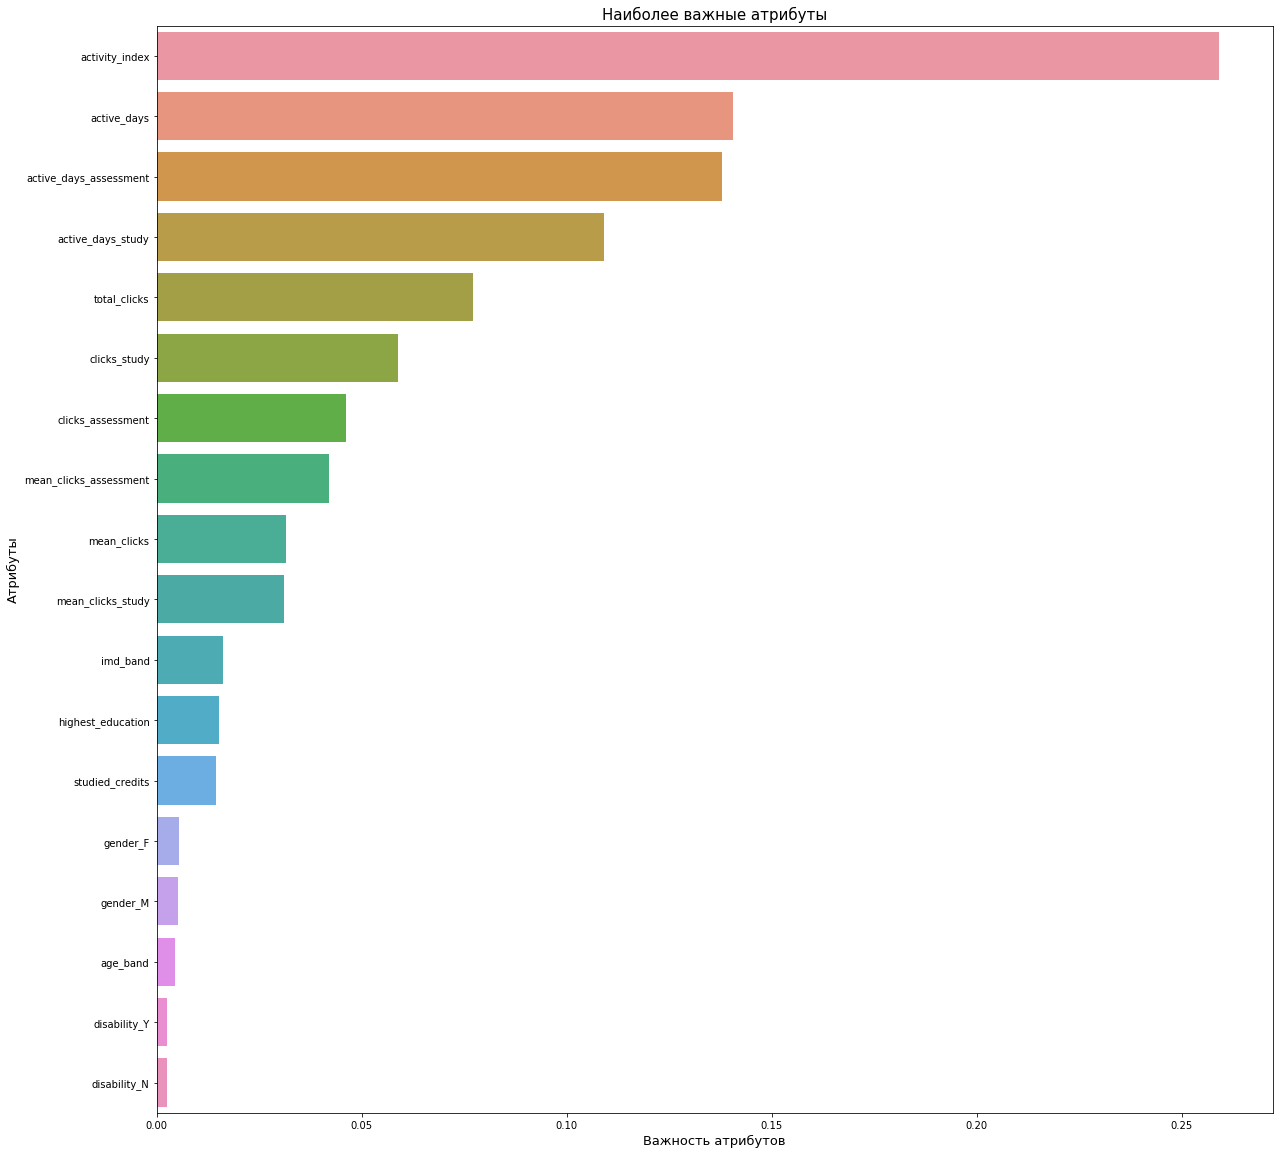

In [93]:
headers = list(model_table_dummies.iloc[:,3:-4].columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов',fontsize =13)
plt.ylabel('Атрибуты',fontsize =13)
plt.title("Наиболее важные атрибуты",fontsize =15)
plt.show()

Оцениваем качество модели

In [94]:
print ('Модель "рандомных деревьев" дала точность предсказания', round(model.score(X_test, y_test)*100, 2),'%')

Модель "рандомных деревьев" дала точность предсказания 67.53 %


Переменная "accuracy" показывает долю правильных ответов алгоритма. Однако в случае с несбалансированными классами не является показательной мерой.

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота). Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов. Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

F-мера — среднее гармоническое precision и recall. F-мера достигает максимума при precision и recall, равными единице, и близка к нулю, если один из аргументов близок к нулю.

In [95]:
from sklearn.metrics import  classification_report
report = classification_report(y_test, model.predict(X_test), target_names=list(Y.columns), zero_division =0)
print(report)

              precision    recall  f1-score   support

 Distinction       0.50      0.05      0.09       224
        Fail       0.74      0.42      0.54       412
        Pass       0.66      0.86      0.75       875
   Withdrawn       0.99      0.83      0.90       525

   micro avg       0.75      0.68      0.71      2036
   macro avg       0.72      0.54      0.57      2036
weighted avg       0.74      0.68      0.67      2036
 samples avg       0.68      0.68      0.68      2036



Согласно цифрам, наиболее трудным для модели является выявление и сепарация студентов из категории "отличники" ("Distinction") от других учащихся. Показатель  recall говорит нам, что всего лишь 3% отличников программа отнесла к этой группе (то есть остальные 93% были отнесены к другим группам). При этом из числа студентов, которые отнесены моделью к отличникам 70% действительно оказались отличниками, а 30% - в действительности представители других групп.

Студентов, которые собираются покинуть курс, модель выявляет наиболее точно.

## 2 этап проверки гипотез
### Курс ААА

In [76]:
courses_clicks=pd.pivot_table(total_table, values='sum_click', index=['date'], \
                                columns=['code_module','final_result'],  aggfunc=np.sum, fill_value=0)
courses_clicks.head()

code_module          AAA                             BBB                      \
final_result Distinction Fail Pass Withdrawn Distinction Fail Pass Withdrawn   
date                                                                           
-25                    0    0    0         0           0    0    0         0   
-24                    0    0    0         0           0    0    0         0   
-23                    0    0    0         0           0    0    0         0   
-22                    0    0    0         0           0    0    0         0   
-21                    0    0    0         0           0    0    0         0   

code_module          CCC       ...   DDD                   EEE            \
final_result Distinction Fail  ...  Pass Withdrawn Distinction Fail Pass   
date                           ...                                         
-25                    0    0  ...  7356      1698           0    0    0   
-24                    0    0  ...  2698      1321           0    0    0   
-23                    0    0  ...  2235       727           0    0    0   
-22                    0    0  ...   994       459           0    0    0   
-21                    0    0  ...   710       312           0    0    0   

code_module                    FFF                      
final_result Withdrawn Distinction Fail Pass Withdrawn  
date                                                    
-25                  0           0    0    0         0  
-24                  0           0    0    0         0  
-23                  0           0    0    0         0  
-22                  0           0    0    0         0  
-21                  0           0    0    0         0  

[5 rows x 24 columns]

In [77]:
def share(a):
    return round(a/a.sum()*100,2)
courses_clicks=courses_clicks.apply(share, axis=0)

In [78]:
courses_clicks.head()

code_module          AAA                             BBB                      \
final_result Distinction Fail Pass Withdrawn Distinction Fail Pass Withdrawn   
date                                                                           
-25                  0.0  0.0  0.0       0.0         0.0  0.0  0.0       0.0   
-24                  0.0  0.0  0.0       0.0         0.0  0.0  0.0       0.0   
-23                  0.0  0.0  0.0       0.0         0.0  0.0  0.0       0.0   
-22                  0.0  0.0  0.0       0.0         0.0  0.0  0.0       0.0   
-21                  0.0  0.0  0.0       0.0         0.0  0.0  0.0       0.0   

code_module          CCC       ...   DDD                   EEE            \
final_result Distinction Fail  ...  Pass Withdrawn Distinction Fail Pass   
date                           ...                                         
-25                  0.0  0.0  ...  0.96      1.57         0.0  0.0  0.0   
-24                  0.0  0.0  ...  0.35      1.22         0.0  0.0  0.0   
-23                  0.0  0.0  ...  0.29      0.67         0.0  0.0  0.0   
-22                  0.0  0.0  ...  0.13      0.42         0.0  0.0  0.0   
-21                  0.0  0.0  ...  0.09      0.29         0.0  0.0  0.0   

code_module                    FFF                      
final_result Withdrawn Distinction Fail Pass Withdrawn  
date                                                    
-25                0.0         0.0  0.0  0.0       0.0  
-24                0.0         0.0  0.0  0.0       0.0  
-23                0.0         0.0  0.0  0.0       0.0  
-22                0.0         0.0  0.0  0.0       0.0  
-21                0.0         0.0  0.0  0.0       0.0  

[5 rows x 24 columns]

Рисуем график динамики кликов в течение курса

(-10, 268)

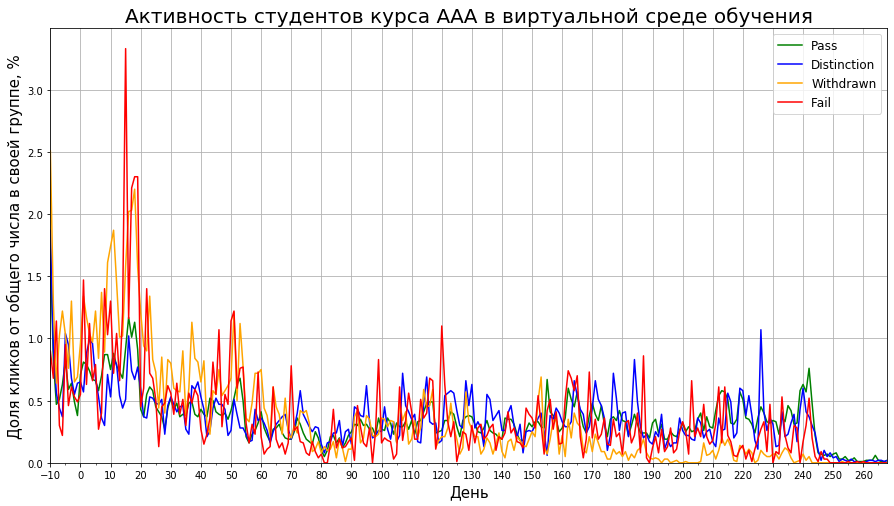

In [79]:
x = courses_clicks.index
y1 = courses_clicks.loc[:,'AAA']['Pass']
y2 = courses_clicks.loc[:,'AAA']['Distinction']
y3 = courses_clicks.loc[:,'AAA']['Withdrawn']
y4 = courses_clicks.loc[:,'AAA']['Fail']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'g', label='Pass')
ax.plot(x, y2, color = 'b', label='Distinction')
ax.plot(x, y3, color = 'orange', label='Withdrawn')
ax.plot(x, y4, color = 'r', label='Fail')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)

plt.title('Активность студентов курса ААА в виртуальной среде обучения', fontsize= 20)
plt.xlabel('День',fontsize =15)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =15)
plt.grid(True)

plt.ylim(0)
plt.xlim(courses_clicks.loc[:,'AAA'].T.sum()[courses_clicks.loc[:,'AAA'].T.sum()>0].index.min(),
         courses_clicks.loc[:,'AAA'].T.sum()[courses_clicks.loc[:,'AAA'].T.sum()>0].index.max())

(-9, 240)

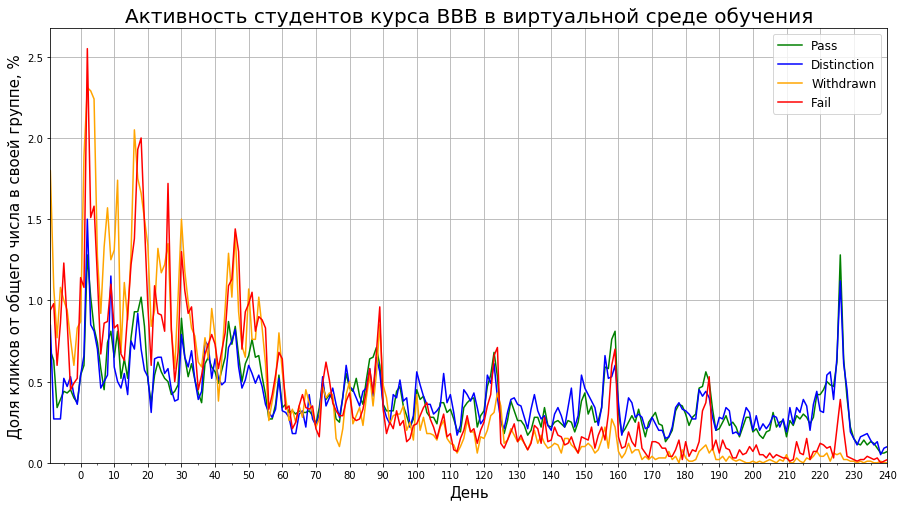

In [80]:
x = courses_clicks.index
y1 = courses_clicks.loc[:,'BBB']['Pass']
y2 = courses_clicks.loc[:,'BBB']['Distinction']
y3 = courses_clicks.loc[:,'BBB']['Withdrawn']
y4 = courses_clicks.loc[:,'BBB']['Fail']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'g', label='Pass')
ax.plot(x, y2, color = 'b', label='Distinction')
ax.plot(x, y3, color = 'orange', label='Withdrawn')
ax.plot(x, y4, color = 'r', label='Fail')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)

plt.title('Активность студентов курса ВВВ в виртуальной среде обучения', fontsize= 20)
plt.xlabel('День',fontsize =15)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =15)
plt.grid(True)

plt.ylim(0)
plt.xlim(courses_clicks.loc[:,'BBB'].T.sum()[courses_clicks.loc[:,'BBB'].T.sum()>0].index.min(),
         courses_clicks.loc[:,'BBB'].T.sum()[courses_clicks.loc[:,'BBB'].T.sum()>0].index.max())

(-18, 269)

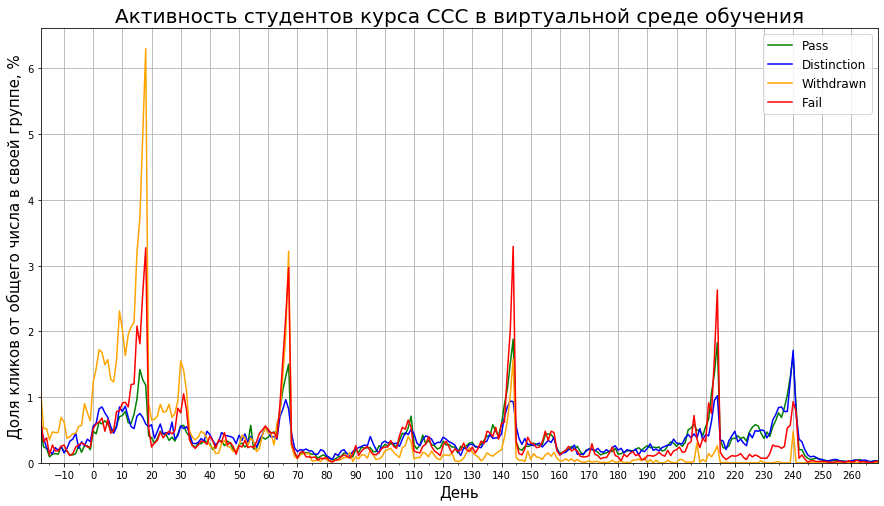

In [81]:
x = courses_clicks.index
y1 = courses_clicks.loc[:,'CCC']['Pass']
y2 = courses_clicks.loc[:,'CCC']['Distinction']
y3 = courses_clicks.loc[:,'CCC']['Withdrawn']
y4 = courses_clicks.loc[:,'CCC']['Fail']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'g', label='Pass')
ax.plot(x, y2, color = 'b', label='Distinction')
ax.plot(x, y3, color = 'orange', label='Withdrawn')
ax.plot(x, y4, color = 'r', label='Fail')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)

plt.title('Активность студентов курса ССС в виртуальной среде обучения', fontsize= 20)
plt.xlabel('День',fontsize =15)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =15)
plt.grid(True)

plt.ylim(0)
plt.xlim(courses_clicks.loc[:,'CCC'].T.sum()[courses_clicks.loc[:,'CCC'].T.sum()>0].index.min(),
         courses_clicks.loc[:,'CCC'].T.sum()[courses_clicks.loc[:,'CCC'].T.sum()>0].index.max())

(-25, 262)

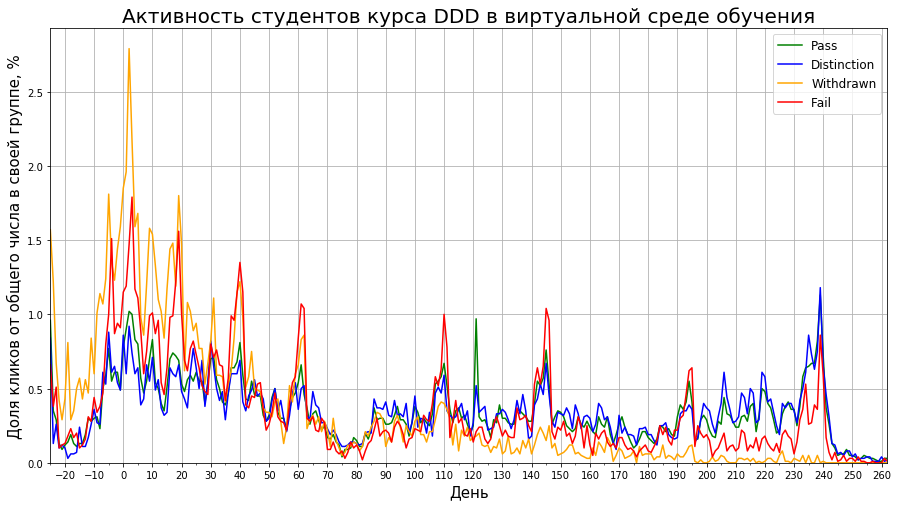

In [82]:
x = courses_clicks.index
y1 = courses_clicks.loc[:,'DDD']['Pass']
y2 = courses_clicks.loc[:,'DDD']['Distinction']
y3 = courses_clicks.loc[:,'DDD']['Withdrawn']
y4 = courses_clicks.loc[:,'DDD']['Fail']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'g', label='Pass')
ax.plot(x, y2, color = 'b', label='Distinction')
ax.plot(x, y3, color = 'orange', label='Withdrawn')
ax.plot(x, y4, color = 'r', label='Fail')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)

plt.title('Активность студентов курса DDD в виртуальной среде обучения', fontsize= 20)
plt.xlabel('День',fontsize =15)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =15)
plt.grid(True)

plt.ylim(0)
plt.xlim(courses_clicks.loc[:,'DDD'].T.sum()[courses_clicks.loc[:,'DDD'].T.sum()>0].index.min(),
         courses_clicks.loc[:,'DDD'].T.sum()[courses_clicks.loc[:,'DDD'].T.sum()>0].index.max())

(-18, 269)

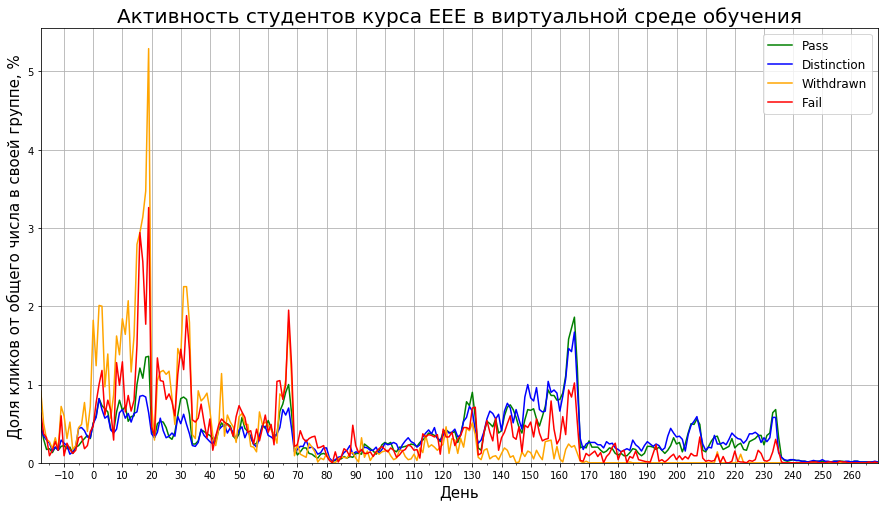

In [83]:
x = courses_clicks.index
y1 = courses_clicks.loc[:,'EEE']['Pass']
y2 = courses_clicks.loc[:,'EEE']['Distinction']
y3 = courses_clicks.loc[:,'EEE']['Withdrawn']
y4 = courses_clicks.loc[:,'EEE']['Fail']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'g', label='Pass')
ax.plot(x, y2, color = 'b', label='Distinction')
ax.plot(x, y3, color = 'orange', label='Withdrawn')
ax.plot(x, y4, color = 'r', label='Fail')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)

plt.title('Активность студентов курса EEE в виртуальной среде обучения', fontsize= 20)
plt.xlabel('День',fontsize =15)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =15)
plt.grid(True)

plt.ylim(0)
plt.xlim(courses_clicks.loc[:,'EEE'].T.sum()[courses_clicks.loc[:,'EEE'].T.sum()>0].index.min(),
         courses_clicks.loc[:,'EEE'].T.sum()[courses_clicks.loc[:,'EEE'].T.sum()>0].index.max())

(-18, 240)

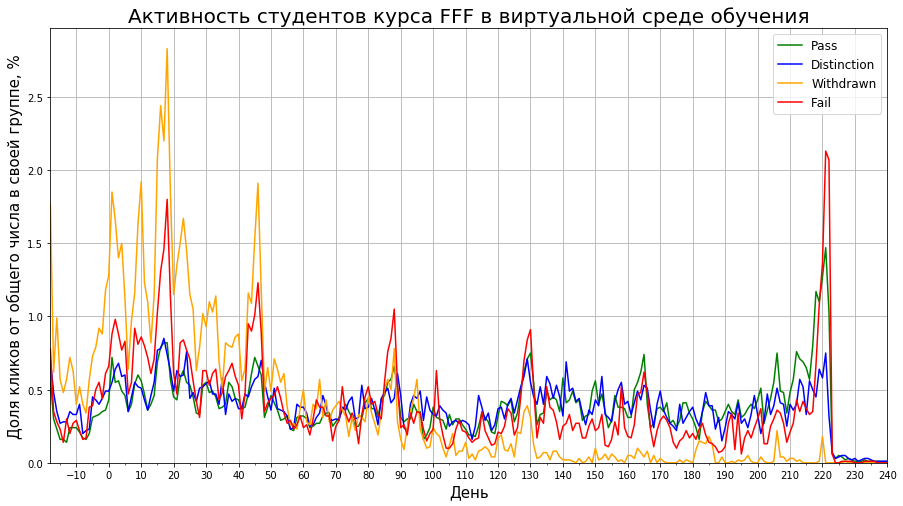

In [84]:
x = courses_clicks.index
y1 = courses_clicks.loc[:,'FFF']['Pass']
y2 = courses_clicks.loc[:,'FFF']['Distinction']
y3 = courses_clicks.loc[:,'FFF']['Withdrawn']
y4 = courses_clicks.loc[:,'FFF']['Fail']

fig, ax = plt.subplots()

ax.plot(x, y1, color = 'g', label='Pass')
ax.plot(x, y2, color = 'b', label='Distinction')
ax.plot(x, y3, color = 'orange', label='Withdrawn')
ax.plot(x, y4, color = 'r', label='Fail')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

fig.set_figwidth(15)
fig.set_figheight(8)
ax.legend(fontsize =12)

plt.title('Активность студентов курса FFF в виртуальной среде обучения', fontsize= 20)
plt.xlabel('День',fontsize =15)
plt.ylabel('Доля кликов от общего числа в своей группе, %',fontsize =15)
plt.grid(True)

plt.ylim(0)
plt.xlim(courses_clicks.loc[:,'FFF'].T.sum()[courses_clicks.loc[:,'FFF'].T.sum()>0].index.min(),
         courses_clicks.loc[:,'FFF'].T.sum()[courses_clicks.loc[:,'FFF'].T.sum()>0].index.max())

## Сравнение поведения студентов разных групп

Для того, чтобы понять, отличается ли поведение студентов из разных групп, нужно провести тестирование, которое покажет, существует ли статистическое различие выборками.

Выбор вида теста зависит в частности от вида распределения данных

Text(0.5, 0, 'Клики в день(в % от общего числа кликов за курс)')

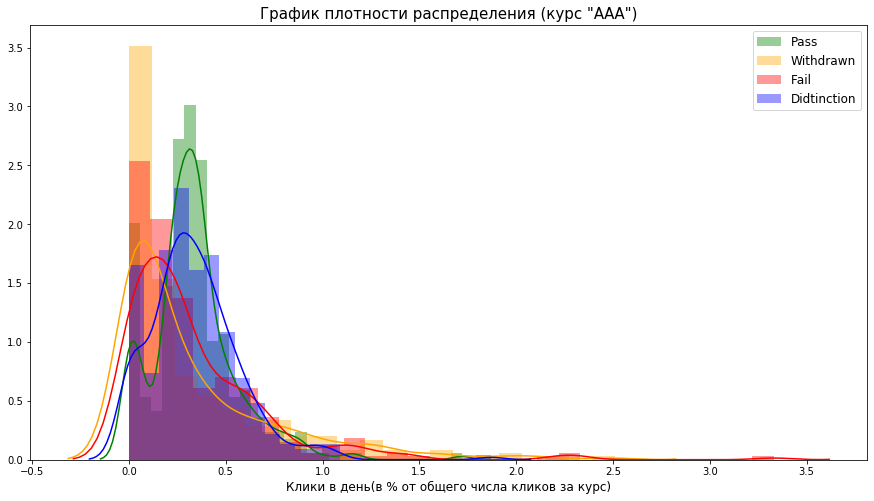

In [85]:
plt.figure(figsize=(15,8))
sns.distplot(courses_clicks.loc[:,'AAA']['Pass'], color ='g')
sns.distplot(courses_clicks.loc[:,'AAA']['Withdrawn'], color ='orange')
sns.distplot(courses_clicks.loc[:,'AAA']['Fail'], color ='r')
sns.distplot(courses_clicks.loc[:,'AAA']['Distinction'], color ='b')

plt.legend(['Pass', 'Withdrawn', 'Fail', 'Didtinction'], fontsize = 12)
plt.title('График плотности распределения (курс "AAA")', fontsize = 15)
plt.xlabel('Клики в день(в % от общего числа кликов за курс)', fontsize = 12)


Text(0.5, 0, 'Клики в день(в % от общего числа кликов за курс)')

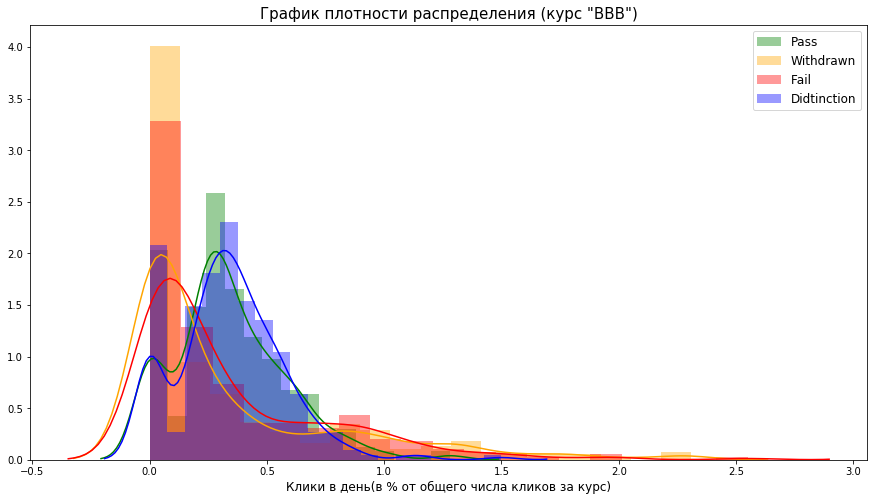

In [86]:
plt.figure(figsize=(15,8))
sns.distplot(courses_clicks.loc[:,'BBB']['Pass'], color ='g')
sns.distplot(courses_clicks.loc[:,'BBB']['Withdrawn'], color ='orange')
sns.distplot(courses_clicks.loc[:,'BBB']['Fail'], color ='r')
sns.distplot(courses_clicks.loc[:,'BBB']['Distinction'], color ='b')

plt.legend(['Pass', 'Withdrawn', 'Fail', 'Didtinction'], fontsize = 12)
plt.title('График плотности распределения (курс "BBB")', fontsize = 15)
plt.xlabel('Клики в день(в % от общего числа кликов за курс)', fontsize = 12)


Text(0.5, 0, 'Клики в день(в % от общего числа кликов за курс)')

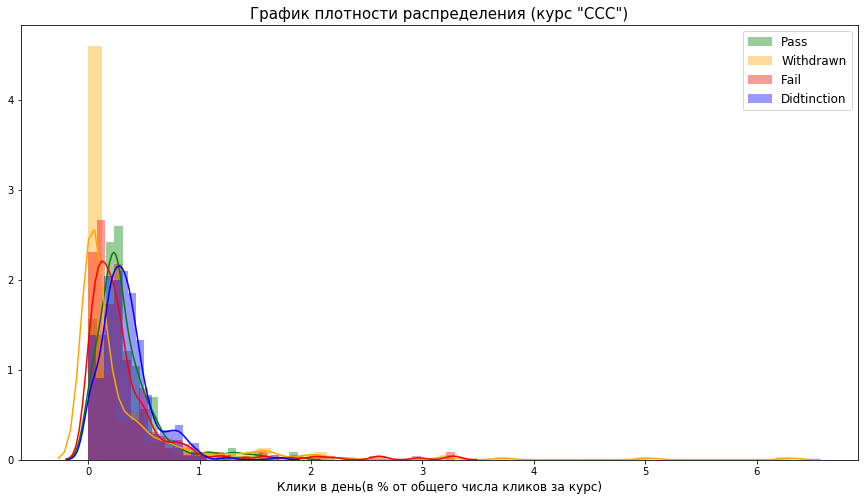

In [87]:
plt.figure(figsize=(15,8))
sns.distplot(courses_clicks.loc[:,'CCC']['Pass'], color ='g')
sns.distplot(courses_clicks.loc[:,'CCC']['Withdrawn'], color ='orange')
sns.distplot(courses_clicks.loc[:,'CCC']['Fail'], color ='r')
sns.distplot(courses_clicks.loc[:,'CCC']['Distinction'], color ='b')

plt.legend(['Pass', 'Withdrawn', 'Fail', 'Didtinction'], fontsize = 12)
plt.title('График плотности распределения (курс "CCC")', fontsize = 15)
plt.xlabel('Клики в день(в % от общего числа кликов за курс)', fontsize = 12)


Text(0.5, 0, 'Клики в день(в % от общего числа кликов за курс)')

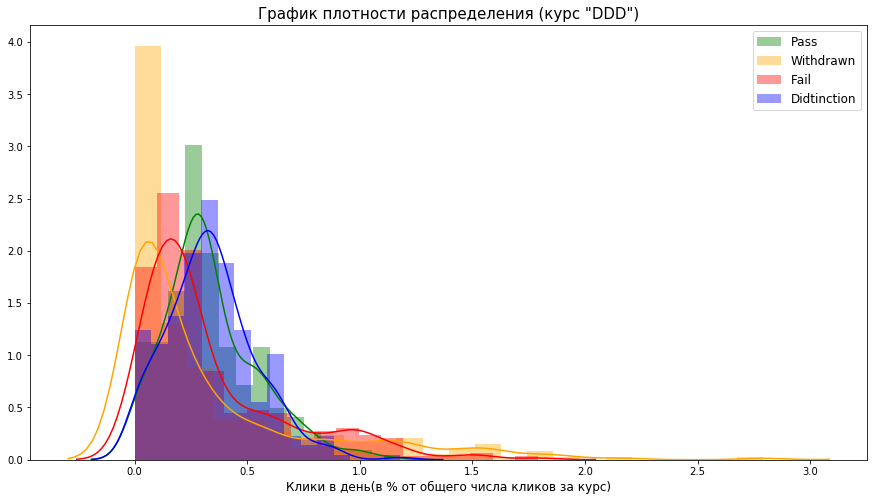

In [88]:
plt.figure(figsize=(15,8))
sns.distplot(courses_clicks.loc[:,'DDD']['Pass'], color ='g')
sns.distplot(courses_clicks.loc[:,'DDD']['Withdrawn'], color ='orange')
sns.distplot(courses_clicks.loc[:,'DDD']['Fail'], color ='r')
sns.distplot(courses_clicks.loc[:,'DDD']['Distinction'], color ='b')

plt.legend(['Pass', 'Withdrawn', 'Fail', 'Didtinction'], fontsize = 12)
plt.title('График плотности распределения (курс "DDD")', fontsize = 15)
plt.xlabel('Клики в день(в % от общего числа кликов за курс)', fontsize = 12)


Text(0.5, 0, 'Клики в день(в % от общего числа кликов за курс)')

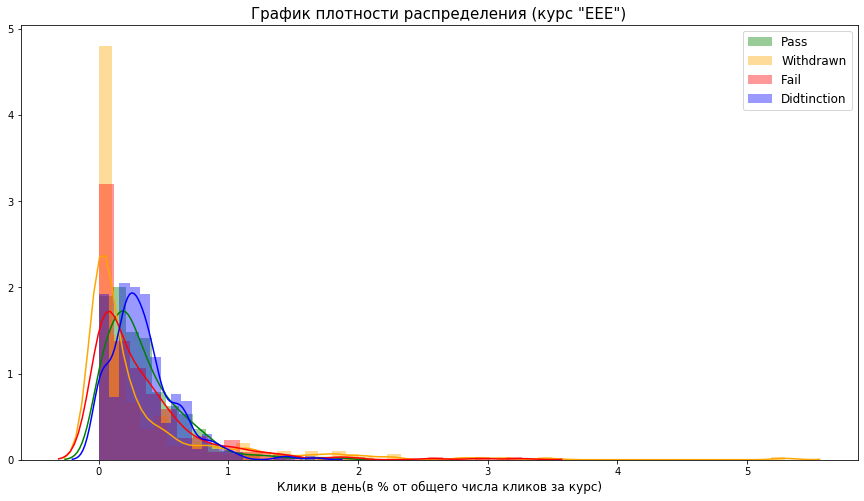

In [89]:
plt.figure(figsize=(15,8))
sns.distplot(courses_clicks.loc[:,'EEE']['Pass'], color ='g')
sns.distplot(courses_clicks.loc[:,'EEE']['Withdrawn'], color ='orange')
sns.distplot(courses_clicks.loc[:,'EEE']['Fail'], color ='r')
sns.distplot(courses_clicks.loc[:,'EEE']['Distinction'], color ='b')

plt.legend(['Pass', 'Withdrawn', 'Fail', 'Didtinction'], fontsize = 12)
plt.title('График плотности распределения (курс "EEE")', fontsize = 15)
plt.xlabel('Клики в день(в % от общего числа кликов за курс)', fontsize = 12)


Text(0.5, 0, 'Клики в день(в % от общего числа кликов за курс)')

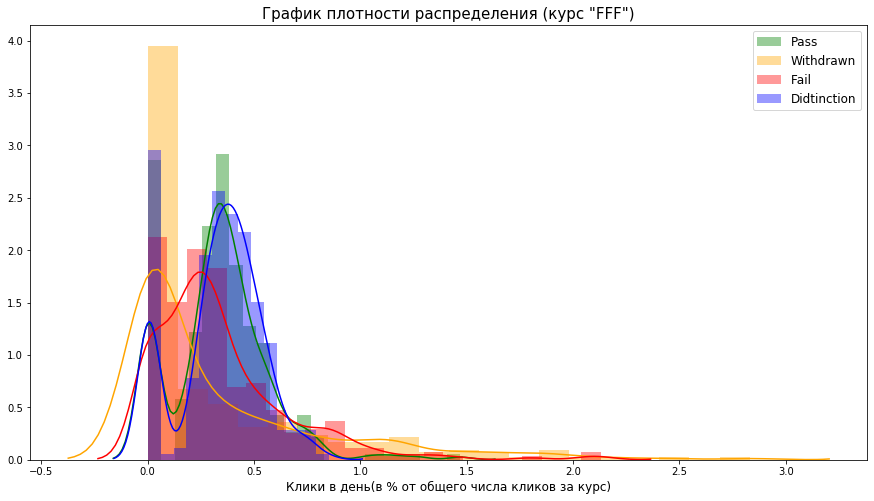

In [90]:
plt.figure(figsize=(15,8))
sns.distplot(courses_clicks.loc[:,'FFF']['Pass'], color ='g')
sns.distplot(courses_clicks.loc[:,'FFF']['Withdrawn'], color ='orange')
sns.distplot(courses_clicks.loc[:,'FFF']['Fail'], color ='r')
sns.distplot(courses_clicks.loc[:,'FFF']['Distinction'], color ='b')

plt.legend(['Pass', 'Withdrawn', 'Fail', 'Didtinction'], fontsize = 12)
plt.title('График плотности распределения (курс "FFF")', fontsize = 15)
plt.xlabel('Клики в день(в % от общего числа кликов за курс)', fontsize = 12)


Данные распределены ненормально, моэтому используем критерий Манна-Уитни

Условимся, что уровень значимости равен 5%

#### PASS / FAIL

In [96]:
u, p_value_AAA_1 = sts.mannwhitneyu(courses_clicks.loc[:,'AAA']['Pass'], courses_clicks.loc[:,'AAA']['Fail'])
u, p_value_BBB_1 = sts.mannwhitneyu(courses_clicks.loc[:,'BBB']['Pass'], courses_clicks.loc[:,'BBB']['Fail'])
u, p_value_CCC_1 = sts.mannwhitneyu(courses_clicks.loc[:,'CCC']['Pass'], courses_clicks.loc[:,'CCC']['Fail'])
u, p_value_DDD_1 = sts.mannwhitneyu(courses_clicks.loc[:,'DDD']['Pass'], courses_clicks.loc[:,'DDD']['Fail'])
u, p_value_EEE_1 = sts.mannwhitneyu(courses_clicks.loc[:,'EEE']['Pass'], courses_clicks.loc[:,'EEE']['Fail'])
u, p_value_FFF_1 = sts.mannwhitneyu(courses_clicks.loc[:,'FFF']['Pass'], courses_clicks.loc[:,'FFF']['Fail'])


#### PASS / WITHDRAWN

In [97]:
u, p_value_AAA_2 = sts.mannwhitneyu(courses_clicks.loc[:,'AAA']['Pass'], courses_clicks.loc[:,'AAA']['Withdrawn'])
u, p_value_BBB_2 = sts.mannwhitneyu(courses_clicks.loc[:,'BBB']['Pass'], courses_clicks.loc[:,'BBB']['Withdrawn'])
u, p_value_CCC_2 = sts.mannwhitneyu(courses_clicks.loc[:,'CCC']['Pass'], courses_clicks.loc[:,'CCC']['Withdrawn'])
u, p_value_DDD_2 = sts.mannwhitneyu(courses_clicks.loc[:,'DDD']['Pass'], courses_clicks.loc[:,'DDD']['Withdrawn'])
u, p_value_EEE_2 = sts.mannwhitneyu(courses_clicks.loc[:,'EEE']['Pass'], courses_clicks.loc[:,'EEE']['Withdrawn'])
u, p_value_FFF_2 = sts.mannwhitneyu(courses_clicks.loc[:,'FFF']['Pass'], courses_clicks.loc[:,'FFF']['Withdrawn'])


#### DISTINCTION / FAIL

In [98]:
u, p_value_AAA_3 = sts.mannwhitneyu(courses_clicks.loc[:,'AAA']['Distinction'], courses_clicks.loc[:,'AAA']['Fail'])
u, p_value_BBB_3 = sts.mannwhitneyu(courses_clicks.loc[:,'BBB']['Distinction'], courses_clicks.loc[:,'BBB']['Fail'])
u, p_value_CCC_3 = sts.mannwhitneyu(courses_clicks.loc[:,'CCC']['Distinction'], courses_clicks.loc[:,'CCC']['Fail'])
u, p_value_DDD_3 = sts.mannwhitneyu(courses_clicks.loc[:,'DDD']['Distinction'], courses_clicks.loc[:,'DDD']['Fail'])
u, p_value_EEE_3 = sts.mannwhitneyu(courses_clicks.loc[:,'EEE']['Distinction'], courses_clicks.loc[:,'EEE']['Fail'])
u, p_value_FFF_3 = sts.mannwhitneyu(courses_clicks.loc[:,'FFF']['Distinction'], courses_clicks.loc[:,'FFF']['Fail'])


#### DISTINCTION / WITHDRAWN

In [99]:
u, p_value_AAA_4 = sts.mannwhitneyu(courses_clicks.loc[:,'AAA']['Distinction'], courses_clicks.loc[:,'AAA']['Withdrawn'])
u, p_value_BBB_4 = sts.mannwhitneyu(courses_clicks.loc[:,'BBB']['Distinction'], courses_clicks.loc[:,'BBB']['Withdrawn'])
u, p_value_CCC_4 = sts.mannwhitneyu(courses_clicks.loc[:,'CCC']['Distinction'], courses_clicks.loc[:,'CCC']['Withdrawn'])
u, p_value_DDD_4 = sts.mannwhitneyu(courses_clicks.loc[:,'DDD']['Distinction'], courses_clicks.loc[:,'DDD']['Withdrawn'])
u, p_value_EEE_4 = sts.mannwhitneyu(courses_clicks.loc[:,'EEE']['Distinction'], courses_clicks.loc[:,'EEE']['Withdrawn'])
u, p_value_FFF_4 = sts.mannwhitneyu(courses_clicks.loc[:,'FFF']['Distinction'], courses_clicks.loc[:,'FFF']['Withdrawn'])


#### DISTINCTION / PASS

In [100]:
u, p_value_AAA_5 = sts.mannwhitneyu(courses_clicks.loc[:,'AAA']['Distinction'], courses_clicks.loc[:,'AAA']['Pass'])
u, p_value_BBB_5 = sts.mannwhitneyu(courses_clicks.loc[:,'BBB']['Distinction'], courses_clicks.loc[:,'BBB']['Pass'])
u, p_value_CCC_5 = sts.mannwhitneyu(courses_clicks.loc[:,'CCC']['Distinction'], courses_clicks.loc[:,'CCC']['Pass'])
u, p_value_DDD_5 = sts.mannwhitneyu(courses_clicks.loc[:,'DDD']['Distinction'], courses_clicks.loc[:,'DDD']['Pass'])
u, p_value_EEE_5 = sts.mannwhitneyu(courses_clicks.loc[:,'EEE']['Distinction'], courses_clicks.loc[:,'EEE']['Pass'])
u, p_value_FFF_5 = sts.mannwhitneyu(courses_clicks.loc[:,'FFF']['Distinction'], courses_clicks.loc[:,'FFF']['Pass'])

#### FAIL/ WITHDRAWN

In [101]:
u, p_value_AAA_6 = sts.mannwhitneyu(courses_clicks.loc[:,'AAA']['Fail'], courses_clicks.loc[:,'AAA']['Withdrawn'])
u, p_value_BBB_6 = sts.mannwhitneyu(courses_clicks.loc[:,'BBB']['Fail'], courses_clicks.loc[:,'BBB']['Withdrawn'])
u, p_value_CCC_6 = sts.mannwhitneyu(courses_clicks.loc[:,'CCC']['Fail'], courses_clicks.loc[:,'CCC']['Withdrawn'])
u, p_value_DDD_6 = sts.mannwhitneyu(courses_clicks.loc[:,'DDD']['Fail'], courses_clicks.loc[:,'DDD']['Withdrawn'])
u, p_value_EEE_6 = sts.mannwhitneyu(courses_clicks.loc[:,'EEE']['Fail'], courses_clicks.loc[:,'EEE']['Withdrawn'])
u, p_value_FFF_6 = sts.mannwhitneyu(courses_clicks.loc[:,'FFF']['Fail'], courses_clicks.loc[:,'FFF']['Withdrawn'])

Заносим все значения p-value в таблицу

In [102]:
p_value = pd.DataFrame({"Pass/Fail":pd.Series([p_value_AAA_1, p_value_BBB_1, p_value_CCC_1, p_value_DDD_1, p_value_EEE_1, 
                                               p_value_FFF_1], index=['AAA', 'BBB', 'CCC','DDD','EEE','FFF']),
    "Pass/Withdrawn": pd.Series([p_value_AAA_2, p_value_BBB_2, p_value_CCC_2, p_value_DDD_2, p_value_EEE_2, p_value_FFF_2],
                                index=['AAA', 'BBB', 'CCC','DDD','EEE','FFF']),
    "Distinction/Fail":pd.Series([p_value_AAA_3, p_value_BBB_3, p_value_CCC_3, p_value_DDD_3, p_value_EEE_3, 
                                  p_value_FFF_3], index=['AAA', 'BBB', 'CCC','DDD','EEE','FFF']),
     "Distinction/Withdrawn":pd.Series([p_value_AAA_4, p_value_BBB_4, p_value_CCC_4, p_value_DDD_4, p_value_EEE_4, 
                                        p_value_FFF_4], index=['AAA', 'BBB', 'CCC','DDD','EEE','FFF']),
     "Pass/Distinction":pd.Series([p_value_AAA_5, p_value_BBB_5, p_value_CCC_5, p_value_DDD_5, p_value_EEE_5, 
                                   p_value_FFF_5], index=['AAA', 'BBB', 'CCC','DDD','EEE','FFF']),
     "Fail/Withdrawn":pd.Series([p_value_AAA_6, p_value_BBB_6, p_value_CCC_6, p_value_DDD_6, p_value_EEE_6, p_value_FFF_6],
                                index=['AAA', 'BBB', 'CCC','DDD','EEE','FFF'])})
p_value


,Pass/Fail,Pass/Withdrawn,Distinction/Fail,Distinction/Withdrawn,Pass/Distinction,Fail/Withdrawn
AAA,0.000217,1.378608e-06,0.001231,6.097158e-06,0.454609,4.096975e-02
BBB,0.000310,3.214044e-06,0.000131,1.414826e-06,0.308733,3.485975e-02
CCC,0.001320,9.324221e-15,0.000003,4.800872e-17,0.039843,1.863570e-09
DDD,0.000263,9.090762e-10,0.000108,3.305832e-10,0.235363,4.693845e-05
EEE,0.003847,5.959739e-12,0.000316,7.078060e-14,0.145669,1.001105e-05
FFF,0.004383,6.584481e-07,0.000505,1.881378e-07,0.138343,5.416431e-05


In [103]:
p_value=p_value<0.05
p_value.replace({False: 'Нет различий в повведении', True:'Есть различия в повведении'})

,Pass/Fail,Pass/Withdrawn,Distinction/Fail,Distinction/Withdrawn,Pass/Distinction,Fail/Withdrawn
AAA,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Нет различий в повведении,Есть различия в повведении
BBB,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Нет различий в повведении,Есть различия в повведении
CCC,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении
DDD,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Нет различий в повведении,Есть различия в повведении
EEE,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Нет различий в повведении,Есть различия в повведении
FFF,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Есть различия в повведении,Нет различий в повведении,Есть различия в повведении


### Коэффициент

Рассчитаем коэффициент "равномерности" работы с VLE. Этот коэффициент отображает периодичность занятий. \
Измеряется от 0 до 1, чем ближе к 1, тем чаще студенты взаимодействуют с VLE. \
Формула:\
        ∑(количество дней взаимодействия)/ Количество дней в курсе/ Количество студентов

In [104]:
model_table.head()

,code_module,code_presentation,id_student,active_days,total_clicks,active_days_assessment,active_days_study,clicks_assessment,clicks_study,activity_index,mean_clicks,mean_clicks_assessment,mean_clicks_study,gender,highest_education,imd_band,age_band,studied_credits,disability,final_result
0,AAA,2013J,11391,40,934,5,35,120,814,0.15,23.35,24.00,23.26,M,3,9,2,240,N,Pass
1,AAA,2013J,28400,80,1435,7,73,150,1285,0.29,17.94,21.43,17.60,F,3,2,1,60,N,Pass
2,AAA,2013J,30268,12,281,0,12,0,281,0.55,23.42,0.00,23.42,F,2,3,1,60,Y,Withdrawn
3,AAA,2013J,31604,123,2158,18,105,329,1829,0.44,17.54,18.28,17.42,F,2,5,1,60,N,Pass
4,AAA,2013J,32885,70,1034,3,67,36,998,0.25,14.77,12.00,14.90,F,1,5,0,60,N,Pass


In [105]:
pd.pivot_table(model_table, columns=['final_result'],values=['activity_index','mean_clicks_assessment','mean_clicks_study'],
               aggfunc=np.mean, fill_value=0)

final_result,Distinction,Fail,Pass,Withdrawn
activity_index,0.433896,0.159258,0.349002,0.298216
mean_clicks_assessment,25.621031,22.756931,24.435475,19.473585
mean_clicks_study,20.413066,16.010509,18.209822,14.513831


### ТИПЫ Активности

In [106]:
activity_type=(activity_table.iloc[:,:-2].merge(st_VLE, on = ['code_module','code_presentation', 'id_student','date'],
                                                 how = 'left'). 
               merge(VLE[['id_site','activity_type']], on = 'id_site', how = 'left').
               merge(students[['code_module','code_presentation','id_student','final_result']], how='left', 
                     on =['code_module','code_module','code_presentation','id_student']).
               groupby(['final_result','activity_type']).agg({'sum_click': 'sum'}).reset_index())

In [107]:
activity_type=activity_type.merge (activity_type.groupby(['final_result']).sum().reset_index(),\
                                   on=['final_result'])
activity_type['%']=round(activity_type.sum_click_x/activity_type.sum_click_y*100,2)

In [108]:
activity_type_graph = pd.pivot_table(activity_type, values='%', index=['final_result'], \
                                columns=['activity_type'],  aggfunc=sum, fill_value=0)
activity_type_list=activity_type_graph.sum()[activity_type_graph.sum() >1.5].index.tolist()

In [109]:
activity_type_graph=activity_type_graph[activity_type_list]
activity_type_graph.T

final_result,Distinction,Fail,Pass,Withdrawn
activity_type,,,,
forumng,28.31,18.25,22.59,23.57
homepage,17.58,16.92,17.35,19.57
oucontent,19.83,25.77,26.00,21.38
ouwiki,2.90,0.98,2.13,0.54
quiz,20.72,22.58,18.83,19.79
resource,2.40,3.49,2.79,3.99
subpage,6.09,9.36,7.56,8.49
url,1.22,1.34,1.38,1.53


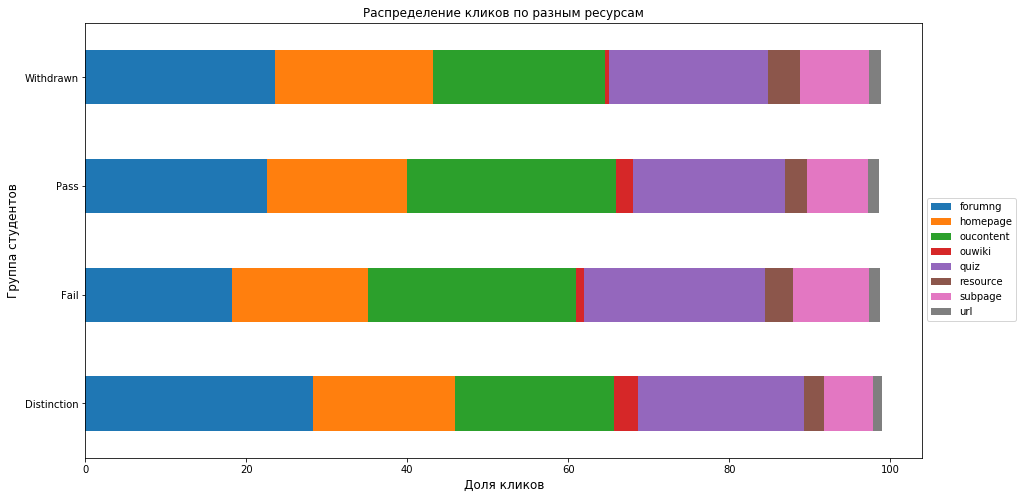

In [110]:
activity_type_graph.plot.barh(stacked=True,figsize=(15,8) )
plt.xlabel('Доля кликов', fontsize =12)
plt.ylabel('Группа студентов', fontsize =12)
plt.title('Распределение кликов по разным ресурсам')
plt.legend(bbox_to_anchor=(1, 0.61))


plt.show()